## Problem i dane


Cel zadania: zbudowanie modelu przewidującego czy ktoś zarabia dużo czy nie na podstawie cech demograficznych.



### Po co to robimy?


Chcemy stworzyć model dla organizacji charytatywnej, która dysponuje olbrzymią bazą danych tego typu informacjami o wielu osobach i planuje zwrócić się do nich z prośbą o wsparcie. 

Nie dysponuje natomiast informacjami o zarobkach, a dla zoptymalizowania działań, chciałaby zwracać się przede wszsytkim do tych osób, które z dużym pradopodobieństwem zarabiają dużo.

<br>

<br>

<br>

<br>

<br>

<br>



<br>

<br>
<br>

<br>

<br>

<br>

<br>

<br>

<br>

<br>

## Dane

Zbiór danych statystycznych opisujących różne cechy demograficzne mieszkańców USA. (Zbiór danych "adults", źródło: repozytorium UCI).

### Zmienne:

* wage_class - zmienna binarna mówiąca o tym, czy dana osoba zarabia rocznie więcej niż 50 tys. dolarów (dane z 1996 r.)
* age - wiek
* workclass - grupa zwodowa
* fnlwgt - waga statystyczna (w uproszczeniu: przypisana przez urząd statystyczny liczba, która jest proporcjonalna do szacowanej liczby osób o podobnych cechach)
* education - wykształcenie
* education-num - wykształcenie
* marital-status - stan cywilny
* occupation - zawód
* relationship - rola w związku/rodzinie
* race - rasa
* sex - płeć
* capital-gain - zyski wypracowane poza stałym źródłem dochodów w ciągu roku
* capital-loss - straty finansowe w ciągu roku
* hours-per-week - średnia liczba godzin przepracowywanych w tygodniu
* native-country - kraj pochodzenia


<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

data = pd.read_csv('data/adult.data', 
                    sep = ",",
                    skipinitialspace=True,  
                    names = column_names)

In [2]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


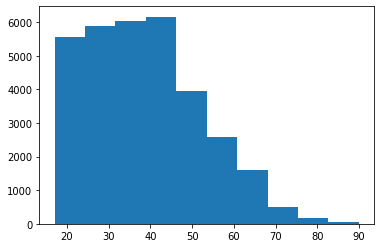

In [4]:
plt.hist(data.age)
plt.show()

In [5]:
data.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

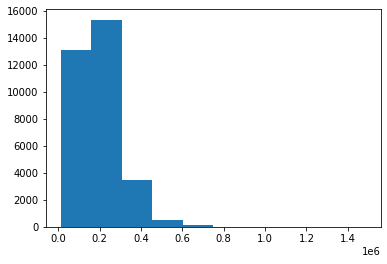

In [6]:
plt.hist(data.fnlwgt)
plt.show()

In [7]:
data.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

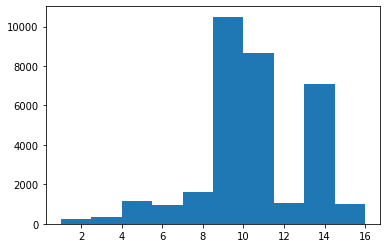

In [8]:
plt.hist(data.education_num)
plt.show()

In [9]:
data.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [10]:
pd.crosstab(data.education, data.education_num)

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,933,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1175,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,433,0,0,0,0,0,0,0,0
1st-4th,0,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,333,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,646,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,514,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1067,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,1382,0,0,0,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


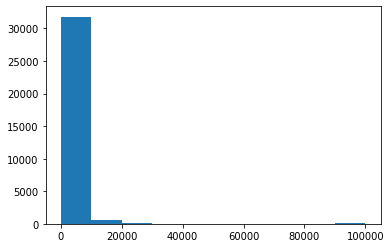

In [13]:
plt.hist(data.capital_gain)
plt.show()

In [14]:
data.capital_gain

0         2174
1            0
2            0
3            0
4            0
         ...  
32556        0
32557        0
32558        0
32559        0
32560    15024
Name: capital_gain, Length: 32561, dtype: int64

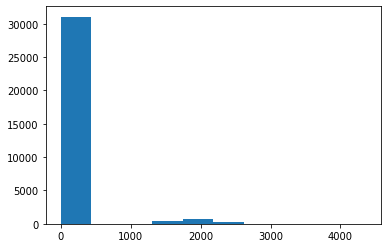

In [15]:
plt.hist(data.capital_loss)
plt.show()

In [16]:
np.mean(data.capital_loss == 0)

0.9533490986149074

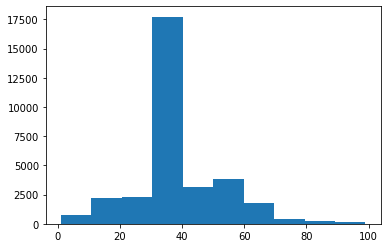

In [17]:
plt.hist(data.hours_per_week)
plt.show()

In [18]:
data.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [19]:
y = data.wage_class == ">50K"
y = y.astype(int)
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: wage_class, Length: 32561, dtype: int64

In [20]:
np.mean(y)

0.2408095574460244

In [21]:
X = data.drop(["fnlwgt", "wage_class"], axis=1)
X

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


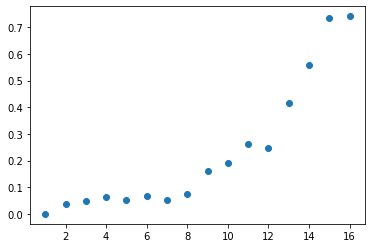

In [22]:
plt.scatter(range(1,17), y.groupby(data.education_num).mean())
plt.show()

In [23]:
X = X.drop(["education"], axis = 1)
X

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States


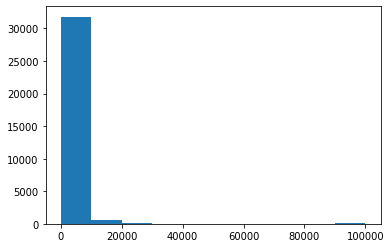

In [24]:
plt.hist(data.capital_gain)
plt.show()

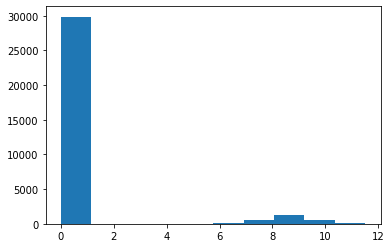

In [25]:
plt.hist(np.log1p(data.capital_gain))
plt.show()

In [26]:
X["capital_gain"] = np.log1p(data.capital_gain)
X["capital_loss"] = np.log1p(data.capital_loss)

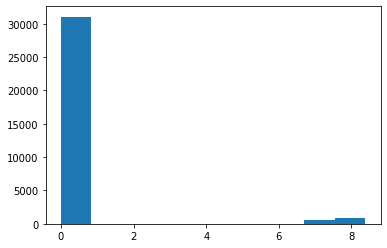

In [27]:
plt.hist(X.capital_loss)
plt.show()

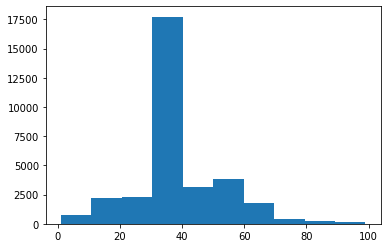

In [28]:
plt.hist(X.hours_per_week)
plt.show()

In [29]:
X.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [30]:
X["imigrant"] = (X.native_country == "United-States").astype(int)
X = X.drop(["native_country"], axis=1)

In [31]:
X

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,imigrant
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40,1
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,1
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,1
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,1
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,38,1
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,40,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,40,1
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,20,1


In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, accuracy_score

In [92]:
X.shape

(32561, 12)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [94]:
X_train_f = pd.get_dummies(X_train)
X_test_f = pd.get_dummies(X_test)

In [95]:
model = DecisionTreeClassifier(min_samples_leaf=50)
model.fit(X_train_f, y_train)

roc_auc_score(y_test, model.predict_proba(X_test_f)[:,1])

0.9144643869840442

In [96]:
accuracy_score(y_test, model.predict(X_test_f))

0.8624501074608536

In [97]:
param_grid = {"min_samples_leaf": [10, 25, 50, 100, 250, 500, 1000],
              "max_depth": [3, 5, 7, 10, None],
              "criterion": ["gini", "entropy"]}
model = DecisionTreeClassifier()

optimizer = GridSearchCV(model, param_grid, 
                         scoring="roc_auc", 
                         cv=10, 
                         n_jobs=-1)

optimizer.fit(X_train_f, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [10, 25, 50, 100, 250, 500, 1000]},
             scoring='roc_auc')

In [98]:
optimizer.best_params_

{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 50}

In [99]:
optimizer.best_score_

0.9069565176213482

In [100]:
roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test_f)[:, 1])

0.9145405126475892

In [101]:
optimizer.cv_results_["mean_test_score"]

array([0.85861448, 0.85865961, 0.85864204, 0.85866548, 0.85811414,
       0.85407321, 0.84615514, 0.88423951, 0.88473997, 0.88411395,
       0.88540641, 0.88528641, 0.88163097, 0.8640919 , 0.90190583,
       0.90194868, 0.90146221, 0.89888595, 0.89688906, 0.88753707,
       0.86414556, 0.90498958, 0.90518418, 0.90600831, 0.90445223,
       0.90090713, 0.88816504, 0.86414556, 0.8868772 , 0.90421462,
       0.90695652, 0.9052492 , 0.9009375 , 0.88816504, 0.86414556,
       0.86044755, 0.86046164, 0.86046495, 0.86046394, 0.86084841,
       0.85542596, 0.84651468, 0.88766593, 0.88758963, 0.88785136,
       0.88779163, 0.88778656, 0.88261258, 0.8643616 , 0.90008292,
       0.89958443, 0.89950788, 0.89783543, 0.89688031, 0.88919316,
       0.86506392, 0.90392555, 0.90431176, 0.90434447, 0.90346628,
       0.90081785, 0.89036525, 0.86506392, 0.88652582, 0.90147944,
       0.90541887, 0.90455111, 0.90130353, 0.89036525, 0.86506392])

In [102]:
list(zip(optimizer.cv_results_["mean_test_score"], optimizer.cv_results_["params"]))

[(0.8586144795787346,
  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 10}),
 (0.8586596124815935,
  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 25}),
 (0.8586420449192348,
  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50}),
 (0.8586654793204918,
  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 100}),
 (0.8581141415633766,
  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 250}),
 (0.8540732065208816,
  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 500}),
 (0.8461551421910753,
  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1000}),
 (0.8842395083028389,
  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}),
 (0.8847399651338451,
  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 25}),
 (0.8841139529214107,
  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}),
 (0.8854064084161319,
  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 100}),
 (0.8852864050043815,
  {'

In [103]:
X_train_r = pd.get_dummies(X_train, drop_first=True)
X_test_r = pd.get_dummies(X_test, drop_first=True)

In [105]:
model = LogisticRegression(penalty="none", max_iter=2000)
model.fit(X_train_r, y_train)

roc_auc_score(y_test, model.predict_proba(X_test_r)[:,1])

0.9067823368024156

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(solver="saga", max_iter=500))
])
param_grid = {"model__penalty": ["l1", "l2"], 
              "model__C": [0.001, 0.01, 0.1, 1, 10, 10, 1000]}

optimizer = GridSearchCV(pipeline, param_grid, 
                         scoring="roc_auc", 
                         cv=10, 
                         n_jobs=-1)

optimizer.fit(X_train_r, y_train)

/home/nor/anaconda3/envs/Elearn/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nor/anaconda3/envs/Elearn/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nor/anaconda3/envs/Elearn/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nor/anaconda3/envs/Elearn/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nor/anaconda3/envs/Elearn/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nor/anaconda3/envs/

/home/nor/anaconda3/envs/Elearn/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nor/anaconda3/envs/Elearn/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nor/anaconda3/envs/Elearn/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nor/anaconda3/envs/Elearn/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nor/anaconda3/envs/Elearn/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nor/anaconda3/envs/

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=500,
                                                           solver='saga'))]),
             n_jobs=-1,
             param_grid={'model__C': [0.001, 0.01, 0.1, 1, 10, 10, 1000],
                         'model__penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [109]:
roc_auc_score(y_test, optimizer.best_estimator_.predict_proba(X_test_f)[:, 1])

0.9069795482529417

In [110]:
optimizer.best_params_

{'model__C': 0.1, 'model__penalty': 'l1'}

# Rozgałęziony pipeline

In [ ]:
cat_features = X_train.columns[X_train.dtypes == "object"]
num_features = X_train.columns[X_train.dtypes != "object"]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
?OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer
?ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop="first"), cat_features)
], 
    sparse_threshold=0
)

In [ ]:
preprocessor.fit(X_train)

In [ ]:
preprocessor.transform(X_train)

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
num_pipeline = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("scaler", StandardScaler())
])

cat_pipeline = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
], 
    sparse_threshold=0
)


pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

pipeline.fit(X_train, y_train)

roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1])